In [3]:
512*512

262144

# GlobalAveragePooling (GAP)
- 입력 Feature map의 채널별로 평균값을 추출하여 1 x 1 x channel 의 Feature map을 생성하는 Pooling
- `model.add(keras.layers.GlobalAveragePooling2D())`
![gap01](figures/09_gap_01.png)

- Feature Extraction layer에서 추출한 Feature map을 Classifier layer로 Flatten해서 전달하면 많은 연결노드와 파라미터가 필요하게된다.     
<span style='background-color:#fff5b1'>GAP를 사용하면 노드와 파라미터의 개수를 효과적으로 줄일 수 있다.</span>
- Feature map의 채널수가 많을 경우 GAP를 사용하는 것이 효과적이나 채널수가 적다면 Flatten을 사용하는 것이 좋다.


![gap02](figures/09_gap_02.png)

# <span style='background-color:#fff5b1'>Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.

> - pretrained Model 
> => 그대로 사용 or 추가학습(Transfer learning: 전이 학습, Fine tuning: 미세조정)

> 1. 전이학습 종류
> - 추론기 // 분류기(feature extractor)
>    - 추론기는 추가로 학습을 해줘야 한다.

- tensorflow hub에서 많은 모델을 받아 사용할 수 있다.

## <span style='background-color:#fff5b1'>Keras에서 제공하는 Pretrained Model 
- tensorflow.keras.applications 패키지를 통해 제공
    - https://www.tensorflow.org/api_docs/python/tf/keras/applications?hl=ko
    - Modules
        - 각 모델별 입력 Image 전처리 함수 제공
    - Functions
        - 각 모델 생성함수
- 모델 생성함수의 주요 매개변수
    - `weights`: 모델의 학습된 weight 지정. 
        - 기본값- 'imagenet'. ImageNet 데이터셋으로 학습된 weight를 가진 모델 생성
    - `include_top`: fully connected layer(분류기)를 포함할지 여부. True 포함시킴, False: 포함 안 시킴
        - False를 지정하면 Feature Extractor인 Convolution Layer들로만 구성된 모델이 생성된다.
    - `input_shape`: Input(입력) 이미지의 크기 shape. 3D 텐서로 지정. (높이, 너비, 채널). 기본값: (224,224,3)
    

> 딥러닝 모델기반 application 개발시 대부분 Transfer Learning을 한다.  
> 다양한 분야에서 다양한 네트워크 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
> [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 

> **State Of The Art(SOTA)**: 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.

## Keras 제공 Pretrained model

In [4]:
from tensorflow import keras
from tensorflow.keras import applications  # Pretrained Model 이 구현된 모듈.

In [5]:
# TOP Layer -> 추론기(Dense layer) : 포함하지 않으면 Convolution Layer들만 로딩.
vgg16_1 = applications.VGG16(weights='imagenet',   # 학습된 weight의 저장경로 또는 "imagenet" (default)
                             include_top=False,  # TOP layer를 포함해서 loading할지 여부(기본: True-포함, False-불포함)
                             input_shape=(224,224,3) # 입력 데이터의 shape을 지정.
                            )

58889256/58889256 [==============================] - 1s 0us/step


In [6]:
vgg16_1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
vgg16_2 = applications.VGG16(include_top=True)
vgg16_2.summary()

553467096/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [9]:
resnet50 = applications.ResNet50V2() #weights='imagenet', include_top=True, input_shape=(224,224,3)

102869336/102869336 [==============================] - 3s 0us/step


In [10]:
resnet50.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

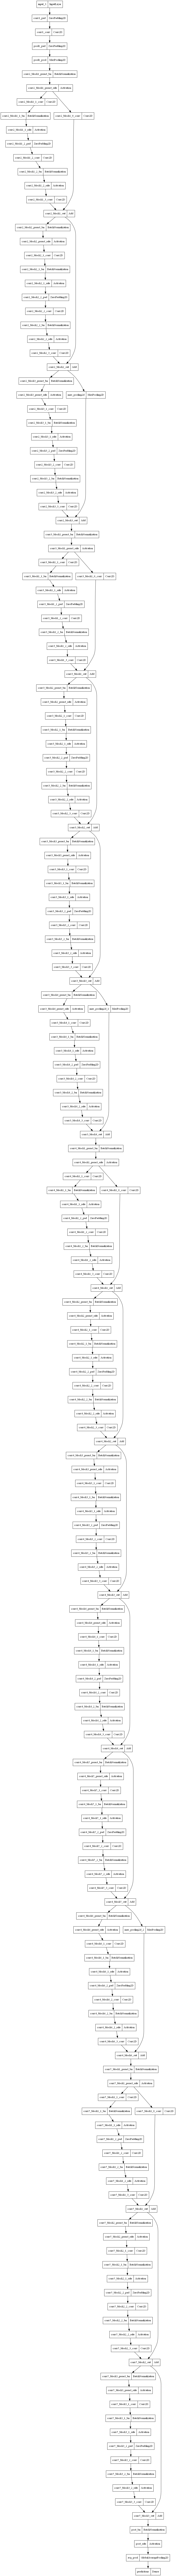

In [11]:
from tensorflow.keras import utils
utils.plot_model(resnet50)

## VGG16 Pretrained 모델을 이용해 이미지 분류
- Keras에서 제공하는 Pretrain 모델들은 Image Net 데이터셋을 학습 했다.
- 최종 Output 결과로 1000개의 class에 대한 확률을 출력한다.
    - Dense(units=1000, activation='softmax')



In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import numpy as np

##### Pretrained Model download

In [13]:
vgg16 = applications.VGG16() # 특징 추출기 + 추론기. input shape: (224, 224, 3) 

##### 추론할 이미지 로딩

In [34]:
img_path = 'test_img/bicycle.jpg'
input_array = img_to_array(load_img(img_path, target_size=(224,224)))[np.newaxis, ...]
input_array.shape
print(input_array.min(), input_array.max())

0.0 255.0


##### 전처리

In [35]:
input_tensor = applications.vgg16.preprocess_input(input_array) # 모델별 전처리 구현 함수.
print(type(input_tensor), input_tensor.shape)
print(input_array.min(), input_tensor.max())

<class 'numpy.ndarray'> (1, 224, 224, 3)
-123.68 151.061


In [41]:
def load_preprocess_image(path):  # 이미지 경로 -> 전처리한 ndarray 반환
    img_array = img_to_array(load_img(path, target_size=(224,224)))  
    return applications.vgg16.preprocess_input(img_array)

In [54]:
def postprocess(pred):   # 추론결과를 받아서 top3 를 출력.
    results = applications.vgg16.decode_predictions(pred, top=3)  # 1개 이상의 이미지 추론 결과 (5, 3, 3)
    for result in results:  # 추론 이미지별 반복
        for idx, (_, class_name, proba) in enumerate(result, start=1):
            print(f"{idx}. {class_name} - {proba*100:.2f}%")
        print('------------------------------------------')

In [56]:
img_path = ['test_img/bicycle.jpg', 'test_img/car.jpg', 'test_img/cat.jpg']
# input_tensor = load_preprocess_image(img_path)[np.newaxis, ...]
input_tensor = np.array([load_preprocess_image(path)  for path in img_path])
print(input_tensor.shape)
# input_tensor.shape
pred = vgg16.predict(input_tensor)
postprocess(pred)

(3, 224, 224, 3)
1/1 [==============================] - 1s 500ms/step
1. mountain_bike - 95.95%
2. unicycle - 1.52%
3. crash_helmet - 0.72%
------------------------------------------
1. sports_car - 53.09%
2. racer - 21.05%
3. convertible - 6.99%
------------------------------------------
1. tiger_cat - 75.68%
2. tabby - 19.48%
3. Egyptian_cat - 4.09%
------------------------------------------


##### 추론

In [36]:
pred = vgg16.predict(input_tensor)
pred.shape
# (1, 1000) -> (추론한결과개수, class별확률)

1/1 [==============================] - 0s 287ms/step


(1, 1000)

In [27]:
pred[0].argmax(axis=-1)

817

In [37]:
label_cls = applications.vgg16.decode_predictions(pred, top=3)
label_cls

[[('n03792782', 'mountain_bike', 0.95945114),
  ('n04509417', 'unicycle', 0.015243837),
  ('n03127747', 'crash_helmet', 0.0071739806)]]

In [38]:
for idx, (_, cls_name, proba) in enumerate(label_cls[0], start=1):
    print(f"{idx}. {cls_name}: {proba*100:.2f}%")

1. mountain_bike: 95.95%
2. unicycle: 1.52%
3. crash_helmet: 0.72%


# Transfer learning (전이학습)
- 사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
- 전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
- 보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    - Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> <span style='background-color:#fff5b1'>**Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
- Keras에서 모델/레이어의 parameter trainable 속성 변경
    - <span style='background-color:#fff5b1'> **Layer.trainable=False**
        - Layer의 trainable 속성을 변경
    - <span style='background-color:#fff5b1'> **Model.trainable=False**
        - 모델내의 모든 Layer들의 trainable 속성을 변경
    - <span style='background-color:#fff5b1'>trainable 속성변경은 **모델 컴파일 전에** 해야 한다.
        
#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

##### 이미지 다운로드

In [57]:
!pip install gdown --upgrade

In [58]:
import gdown
import os
from zipfile import ZipFile
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU
To: C:\Classes\06_딥러닝\cats_and_dogs_small.zip
100%|███████████████████████████████████████████████| 90.8M/90.8M [00:03<00:00, 25.6MB/s]


'cats_and_dogs_small.zip'

In [60]:
# ZipFile('압축 파일 경로')
with ZipFile('cats_and_dogs_small.zip') as zf:
    zf.extractall("data/cats_and_dogs_small")   # 압축풀 디렉토리 경로를 넣어서 푼다.

##### import

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np
import os
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

##### 하이퍼파라미터 설정

In [70]:
LEARNING_RATE = 0.001
N_EPOCH = 100
N_BATCH = 100

IMAGE_SIZE = 224

##### Util 함수 정의
##### 추론함수

In [64]:
def predict_func(image_path, model, preprocess_input):
    """
    이미지 경로를 받아서 모델을 이용해 추론결과를 반환하는 함수
    [parameter]
        image_path: str - 추론한 이미지의 경로
        model: Model객체 - 개/고양이 분류를 위해 학습된 딥러닝 모델
        prerpocess_input: function - 이미지 전처리 함수 객체
    [반환값]
        tuple: (예측확률, 예측라벨, 예측라벨이름)
    """
    class_name = ["cat", "dog"]
    # 이미지 로딩후 배열로 변환
    img_array = img_to_array(load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)))[np.newaxis, ...]
    # 전처리
    input_tensor = preprocess_input(img_array)
    # 추론
    pred = model.predict(input_tensor)
    result_proba = pred[0,0]   # 0.8
    result_class = np.where(result_proba >= 0.5, 1, 0)  # 1
    result_class_name = class_name[result_class]         # dog
    return result_proba, result_class, result_class_name

##### ImageDataGenerator 를 생성하는 함수

In [71]:
def get_generator(preprocess_input):
    """
    cat/dog 데이터의 train/validation/test 용 ImageDataGenerator를 반환하는 함수
    [parameter]
        preprocess_input: function - 전처리용 함수
    [return]
        tuple: (train_dataset_iterator, val_dataset_iterator, test_dataset_iterator)
    """
    # 경로
    train_dir = 'data/cats_and_dogs_small/train/'
    val_dir = 'data/cats_and_dogs_small/validation/'
    test_dir = 'data/cats_and_dogs_small/test/'
    
    # ImageDataGenerator생성 - train: image augmentation을 적용, 공통: preprocessing_input 함수 적용
    train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, # 전처리 함수를 등록
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='constant'
                                  )
    val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
    test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
    # Iterator를 생성 -> IDG에 raw_data의 위치를 연결.
    train_iter = train_gen.flow_from_directory(train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                               batch_size=N_BATCH, class_mode='binary')
    val_iter = val_gen.flow_from_directory(val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                           batch_size=N_BATCH, class_mode='binary')
    test_iter = test_gen.flow_from_directory(test_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                             `batch_size=N_BATCH, class_mode='binary')
    
    return train_iter, val_iter, test_iter
    

##### train/validation/test 데이터셋 로드

In [72]:
train_iter, val_iter, test_iter = get_generator(applications.vgg16.preprocess_input)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [73]:
train_iter.class_indices

{'cats': 0, 'dogs': 1}

##### 모델정의

### 모델/Layer frozon


In [82]:
dense1 = layers.Dense(32, activation='relu')
# print(dense1.trainable)
# dense1.trainable = False  # 이 레이어의 파라미터들(weights)은 학습할때(fit()) 업데이트되지 않는다.=>Frozon
# print(dense1.trainable)
temp_model = keras.Sequential()
temp_model.add(layers.InputLayer(input_shape=(10, )))
temp_model.add(dense1)
temp_model.add(layers.Dense(64, activation='relu'))

print(temp_model.trainable)
temp_model.trainable = False
print(temp_model.trainable)
temp_model.summary()

True
False
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                352       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
Total params: 2,464
Trainable params: 0
Non-trainable params: 2,464
_________________________________________________________________


###  model 에 model을 추가

In [88]:
final_model = keras.Sequential()

final_model.add(layers.InputLayer(input_shape=(10, )))
final_model.add(temp_model)
final_model.add(layers.Dense(1, activation='sigmoid'))

final_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 64)                2464      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,529
Trainable params: 65
Non-trainable params: 2,464
_________________________________________________________________


In [ ]:
# c1 = keras.Sequential([C, C, M])
# c2 = keras.Sequential([C, C, M])
# c3 = keras.Sequential([C, C, M])
# model = keras.Sequential()
# model.add(c1)
# model.add(c2)
# model.add(c2)


In [104]:
def get_model_1(backbone):
    """
    매개변수로 Feature Extractor(Backbone) 모델을 받아서 개/고양이를 분류하는 모델을 생성.
    [parameter]
        backbone: Model - Pretrained backbone 네트워크 모델
    [return]
        model 객체 - 추론기를 추가한 모델
    """
    model = keras.Sequential()
    backbone.trainable = False # train시 backbone의 weight들은 업데이트되도록 하지 않는다. => 이미 학습된 모델이기 때문이다. => frozon: 모델 컴파일 전에 해야한다.
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D()) # Flatten() 대신 GAP 레이어 사용. channel별 평균값으로 처리.
    model.add(layers.Dense(units=1, activation='sigmoid', name='output_layer'))
    
    # 모델 컴파일
    model.compile(optimizer=optimizers.Adam(LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [105]:
model_1 = get_model_1(applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

In [106]:
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


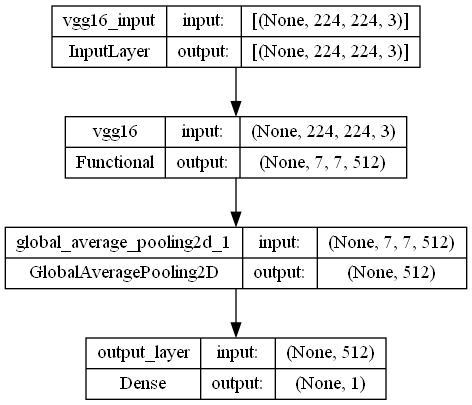

In [95]:
keras.utils.plot_model(model_1, show_shapes=True)

##### 학습

In [ ]:
g_drive_root = "/content/drive/MyDrive"
save_path = os.path.join(g_drive_root, 'saved_model', 'cat_dog_transfer_learning')
mc_callback = keras.callbacks.ModelCheckpoint(save_path, save_best_only=True, save_weights_only=True, verbose=1)
es_callback = keras.callbacks.EarlyStopping(patience=10, verbose=2)

In [96]:
hist = model_1.fit(train_iter, epochs=N_EPOCH, steps_per_epoch=len(train_iter), 
                  validation_data=val_iter, validation_steps=len(val_iter), 
                  callbacks=[mc_callback, es_callback])

Epoch 1/5
20/20 [==============================] - 454s 23s/step - loss: 1.5343 - accuracy: 0.6050 - val_loss: 0.8717 - val_accuracy: 0.7680
Epoch 2/5
20/20 [==============================] - 439s 22s/step - loss: 0.6414 - accuracy: 0.7845 - val_loss: 0.3778 - val_accuracy: 0.8980
Epoch 3/5
14/20 [====================>.........] - ETA: 1:32 - loss: 0.4173 - accuracy: 0.8493

KeyboardInterrupt: 

##### 평가

In [103]:
model_1.evaluate(test_iter)

10/10 [==============================] - 168s 17s/step - loss: 0.3069 - accuracy: 0.9080


[0.30686402320861816, 0.9079999923706055]

##### 새로운 데이터 추론

In [102]:
img_path = 'test_img/dog.jpg'
predict_func(img_path, model_1, applications.vgg16.preprocess_input)

1/1 [==============================] - 0s 178ms/step


(0.53496766, array(1), 'dog')

## Fine-tuning(미세조정)
- Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 재학습시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- <span style='background-color:#fff5b1'>**세 전략 모두 추론기는 trainable로 한다.**

<span style='background-color:#fff5b1'>**<font size='5'>1. 전체 모델을 전부 학습시킨다.(1번)</font>**    
- Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
- 학습에 시간이 많이 걸린다.
    
    
<span style='background-color:#fff5b1'>**<font size='5'>2. Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**     
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
- **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
<span style='background-color:#fff5b1'>**<font size='5'>3. Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**      
- **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> <span style='background-color:#fff5b1'>**Custom dataset:** 내가 학습시키고자 하는 dataset 
> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)

## Model, Layer의 weight 조회
- Transfer Learning을 구현하기 위해 기존 학습된 모델(Pretrained Model)의 Layer를 변경시켜야 한다.

### Model에서 Layer들 조회
- model객체.layers
    - 모델을 구성하는 layer 객체들을 담은 리스트
- model객체.get_layer(Layer이름:str)
    - argument로 전달한 이름의 Layer객체를 반환
    

### Model과 Layer의 weight들 조회 및 설정
- Layer와 Model은 **Weight 조회**와 관련해 세가지 **속성**을 제공
    - **weights:** 레이어의 모든 weight 변수들을 담은 리스트
        - get_weights() : 레이어의 모든 weight 변수 리스트를 카피해서 반환한다.
    - **trainable_weights:** Train(학습)시 업데이트 되는 weights들 리스트
    - **non_trainable_weights:** Train(학습)시 업데이트 되지 않는(훈련되지 않는) weights들 리스트
- Layer와 Model은 boolean 값을 가지는 속성 **`trainable`** 을 제공
    - <span style='background-color:#fff5b1'>trainable을 **False로** 설정하면</span> Layer의 weights들이 훈련가능에서 <span style='background-color:#fff5b1'>**훈련 불가능** </span>상태로 변경된다. 이런 상태를<span style='background-color:#fff5b1'> **Frozen-동결** </span>이라고 하며 학습시 weight들이 업데이트 되지 않는다.

In [109]:
test_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1), name='my_conv'), 
    layers.MaxPooling2D(padding='same'), 
    
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D(padding='same'), 
    
    layers.Flatten(),
    layers.Dense(units=256, activation='relu'), 
    layers.Dense(units=10, activation='softmax', name='output_layer')
])

In [110]:
test_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_conv (Conv2D)            (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_20 (Dense)            (None, 256)             

In [112]:
# 모델을 구성하는 Layer들을 리스트로 반환.
layer_list = test_model.layers
type(layer_list), len(layer_list)

(list, 7)

In [115]:
print(layer_list[0], layer_list[1])
layer_list

<keras.layers.convolutional.conv2d.Conv2D object at 0x000002773B291610> <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002773B291520>


In [116]:
temp_model.layers

In [120]:
# layer의 이름을 이용해서 특정 layer조회
test_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_conv (Conv2D)            (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_20 (Dense)            (None, 256)             

In [118]:
l1 = test_model.get_layer("my_conv")
print(l1)

In [119]:
l2 = test_model.get_layer('conv2d_2')
l2

In [122]:
# layer의 trainable 상태 조회(변경)
l1.trainable = False
print(l1.trainable)

False


In [123]:
test_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_conv (Conv2D)            (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_20 (Dense)            (None, 256)             

In [127]:
# layer의 이름 조회(변경은 안됨.)
l1.name

'my_conv'

In [129]:
# layer의 파라미터들을 조회
param = l1.weights
type(param), len(param)  #[weights, bias]

(list, 2)

In [130]:
param[0]
# (3, 3, 1, 32) #(kernel_size:h, kernel_size:w, channel, filter개수)

<tf.Variable 'my_conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.120261  , -0.01150757,  0.10743128,  0.03131668,
          -0.12612624,  0.08158046, -0.09014226, -0.04634596,
           0.03109317,  0.13567989,  0.12640254, -0.09451535,
           0.1331981 ,  0.05917309,  0.11819272,  0.00280835,
          -0.00047517, -0.11264725,  0.1307592 , -0.03204119,
           0.07620935,  0.09038822, -0.01657237, -0.13516875,
          -0.04459432,  0.04744153,  0.10743125, -0.12881233,
           0.06728759, -0.0619866 , -0.0581637 ,  0.04772232]],

        [[-0.10447295, -0.01502514,  0.08902206, -0.13701242,
          -0.08878785,  0.04628272,  0.00872244,  0.09376255,
           0.0568389 , -0.00740282,  0.13004614, -0.03869914,
           0.10789032, -0.0130084 , -0.09741876, -0.09127749,
           0.04291005,  0.11962385,  0.01577646, -0.01553752,
          -0.03389646,  0.04274607,  0.08857545,  0.12114792,
           0.06314591, -0.08016515,  0.02072418, -0.095

### Fine Tuning 예제

#### Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습

- Conv_base에서 가장 Top부분에 있는 레이어에 대해 fine-tuning.
    - 앞의 layer들은 비교적 일반적이고 재사용 가능한 feature를 학습
    - 너무 많은 parameter를 학습시키면 overfitting의 위험이 있음 (특히 새로운 데이터의 수가 적을 때)

##### 하이퍼파라미터 

##### 모델 정의, 컴파일

##### 학습

##### 결과 시각화

##### 최종 평가

### 새로운 데이터 추론